Duplicate key in file PosixPath('/Users/nagatoshota/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 250 ('font.family:   IPAexGothic')


41088 回繰り返しました
勾配法で得られた、損失関数を最小にするaとbは
8.477403460299513
145.09863070323775
最終的な平均二乗誤差
344.72719664673


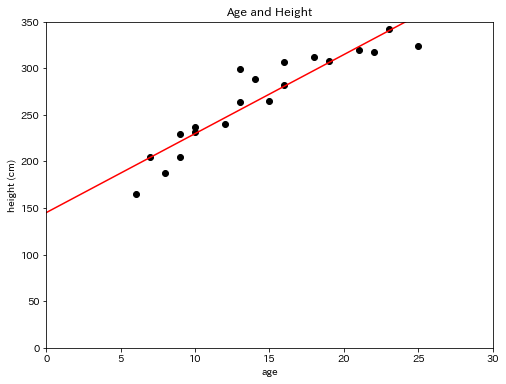

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# UMAの年齢と身長
age = np.array([6,8,9,7,9,10,10,12,13,15,16,14,13,16,19,18,22,21,25,23])
height = np.array([164.61,187.25,204.30,204.88,229.48,231.99,236.59,240.36,263.98,264.79,281.85,288.38,298.75,306.34,307.48,312.44,317.72,319.41,323.96,341.96])

# 最小化したい損失関数は、平均二乗誤差として定義
def lossFunction(para_vec):
    para_a = para_vec[0]
    para_b = para_vec[1]

    # 誤差を2乗しmeanでその平均を求めて返す
    return np.mean((para_a * age + para_b - height)**2)

# 偏微分もどき
def partialDefferential(func, vec): # 全ての変数について偏微分した結果を傾きベクトルにする
    """
    func: 関数
    vec: 現在地のベクトル
    """
    vec_tilt = np.empty_like(vec) # 空の傾きベクトルを生成する

    for i in range(len(vec)):
        vec_tilt[i] = partialDefferentialHelper(func, vec, i)

    return vec_tilt # 確定した傾きベクトルを返す

def partialDefferentialHelper(func, vec, i):
    # 微小な横幅
    micro_width = 0.0001
    # 差分計算ベクトル
    vec_calc_difference = np.zeros_like(vec)
    vec_calc_difference[i] = micro_width
    # 微小な横幅を使って引き算と割り算を行い、傾きを求めて返す
    return (func(vec + vec_calc_difference) - func(vec - vec_calc_difference)) / (2*micro_width)

def gradient(func, vec_start, learning_rate=0.001, max_roop=100000):
    vec = vec_start
    # 収束条件の傾き
    tilt = 0.001

    for i in range(max_roop):
        # 現在地での傾きを求める
        vec_tilt = partialDefferential(func, vec)
        # 勾配を基にして現在地を変更
        vec = vec - learning_rate * vec_tilt

        # 収束条件の傾きをどちらも下回ったらループ終了、ただしiが0の時は傾きベクトルが[0,0]なので終了しない
        if abs(vec_tilt[0]) < tilt and abs(vec_tilt[1]) < tilt and i > 0:
            break

    # 最終的な位置を返す
    print(str(i)+" 回繰り返しました")    
    return vec




# 勾配法で関数の最小値を探す (初期値は 5,5)
min = gradient(lossFunction, [5, 5])
print("勾配法で得られた、損失関数を最小にするaとbは")
print(min[0])
print(min[1])
print("最終的な平均二乗誤差")
print(lossFunction(min))

########################## 仕上げに散布図を描き、回帰直線も表示
plt.figure(figsize = (8, 6))
plt.title("Age and Height")
plt.xlim([0, 30])
plt.ylim([0, 350])
plt.xlabel("age")
plt.ylabel("height (cm)")
plt.scatter(age,height,color="k") # 散布図
# 直線を重ねる
############ この下の3行のコメントを外しましょう ############
x2 = np.linspace(0,30,10) # X軸方向の等間隔の配列
y2 = min[0]*x2+min[1] # Y軸方向の値も配列にする(ax+b の値)
plt.plot(x2,y2,color="r")
plt.show()